In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Define file path
lst_file_path = "./data/psp_daily_Gx4qi1F1_D.lst"

# Define column widths based on the .fmt file
widths = [4,4,3,7,9,8,8,10]
column_names = ["Year", "DOY", "Hour", "Radial_Distance_AU", "IMF_B_nT",
                "Proton_Speed_km_s", "Proton_Density_N_cm3", "Proton_Temperature_K"]

# Read the .lst file
df = pd.read_fwf(lst_file_path, names=column_names, skiprows=0,widths = widths) 
df.replace(99999.9, np.nan, inplace=True)
df.replace(99999.99, np.nan, inplace=True)
df.replace(99999999., np.nan, inplace=True)

In [2]:
df

,Year,DOY,Hour,Radial_Distance_AU,IMF_B_nT,Proton_Speed_km_s,Proton_Density_N_cm3,Proton_Temperature_K
0,2018,279,0,0.69,7.65,NaN,NaN,NaN
1,2018,280,0,0.68,6.86,NaN,NaN,NaN
2,2018,281,0,0.67,6.95,NaN,NaN,NaN
3,2018,282,0,0.65,7.86,NaN,NaN,NaN
4,2018,283,0,0.64,8.96,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2028,2024,116,0,0.65,10.26,NaN,NaN,NaN
2029,2024,117,0,0.66,13.43,NaN,NaN,NaN
2030,2024,118,0,0.67,8.04,NaN,NaN,NaN
2031,2024,119,0,0.68,6.91,NaN,NaN,NaN


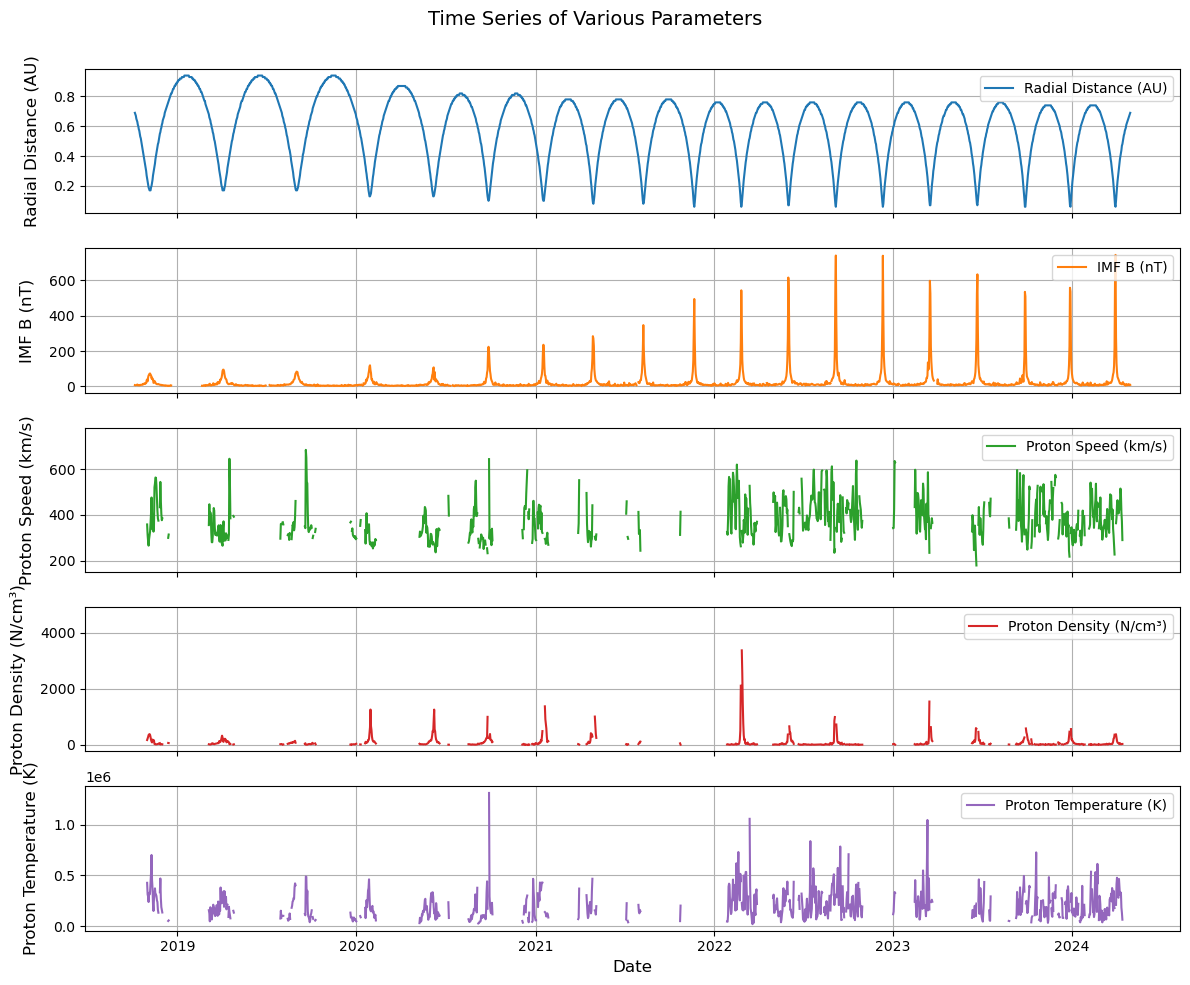

In [3]:
# Convert Year, DOY, and Hour to datetime
df["Datetime"] = df.apply(lambda row: datetime(int(row["Year"]), 1, 1) + timedelta(days=int(row["DOY"]) - 1, hours=int(row["Hour"])), axis=1)
#df['Datetime'] = 

# Define the parameters to plot
parameters = ["Radial_Distance_AU", "IMF_B_nT", "Proton_Speed_km_s", "Proton_Density_N_cm3", "Proton_Temperature_K"]
titles = ["Radial Distance (AU)", "IMF B (nT)", "Proton Speed (km/s)", "Proton Density (N/cm³)", "Proton Temperature (K)"]

# Create subplots
fig, axes = plt.subplots(len(parameters), 1, figsize=(12, 10), sharex=True)

# Plot each parameter in a separate subplot
for i, param in enumerate(parameters):
    axes[i].plot(df["Datetime"], df[param], label=titles[i], color="C" + str(i))
    axes[i].set_ylabel(titles[i], fontsize=12, labelpad=10)  # Increase font size for left labels
    axes[i].legend(loc="upper right", fontsize=10)  # Keep legends smaller in upper right
    axes[i].grid()

# Set common x-axis label
axes[-1].set_xlabel("Date", fontsize=12)

# Set main title
fig.suptitle("Time Series of Various Parameters", fontsize=14)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


In [5]:
#Greg likes 0 rather than missing values
df.replace(np.nan, 0, inplace=True)
# Save the DataFrame to a CSV file
df.to_csv("./data/psp_solarwind_mag.csv", index=False)
